# Homework 2

# Part 1: Expected Prediction Risk (EPR) 

The Expected Prediction Risk (EPR) is a fundamental concept that helps us measure how well our predictions match reality, accounting for all possible scenarios weighted by their probability of occurrence. Consider a supervised learning problem with a dataset $(x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i$ are the labels (being them real numbers or categorical). We assume that the data is generated by a joint distribution, with density function $p(x,y)$. We fit a model $f(x)$ to this dataset. 

Given a measure of risk $L(y, f(x))$, the Expected Prediction Risk (EPR) is defined as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[L(Y, f(X))]$$


First, let us consider the regression case.

Consider a dataset $\mathcal{D}_{regr} = (x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$.

We have seen in the class that in regression cases, the squared loss is a natural choice. Consider the squared loss function $L(y, f(x)) = (y - f(x))^2$. We define the Expected Prediction Risk (EPR) as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[(Y - f(X))^2]$$

### **Q1**: Simplify the expression of the EPR(f) to obtain that the EPR is minimized by the conditional mean of Y given X.

Let us consider now a categorical dataset. In order to highlight the difference with the regression case, we will use a different notation to highlight the difference: $\mathcal{D}_{class} = (x_i, c_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $c_i \in \{1, \ldots, K\}$ is the true class of the $i$-th sample. We fit a model $\hat{c}(x){\in \{1, \ldots, K\}}$ to this dataset.

### **Q2** Write the expression of the EPR for the classification case simplified as much as possible for general risk functions.


### **Q3** Find the optimal classifier for 0-1 loss: $L(c, \hat{c}) = \mathbb{I}(c \neq \hat{c})$ known as the Bayes classifier.


Let us apply these concepts to Gaussian Mixture Models. Let us fix the number of components $K=3$ and consider the following model for the joint distribution $p(x,c)$:

$$p(x|c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$$
$$p(c_k) = \pi_k$$
where $\pi_k$ are the probabilities of the different classes, $\mu_k$ are the means and $\Sigma_k$ are the covariance matrices of the $k$-th component.



### **Q4** Write a python function that generates samples from this model.



In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
def sample_x_c(pi_vector, mean_vector, covariance_vector, n_samples):
    
    # Sample classes ck
    classes = np.array([0,1,2])
    ck_samples = np.random.choice(classes, size=n_samples, p=pi_vector)
    
    # Sample x given the classes
    x_samples = list()
    for ck in ck_samples:
          x_samples.append(multivariate_normal.rvs(mean_vector[ck], covariance_vector[ck], size=1))
          
    return np.array(x_samples), ck_samples
    

### **Q5** Take now 1000 samples from this model and plot them using matplotlib using the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [0.3, 0.4, 0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]$$


In [3]:
pi_vector = np.array([0.3, 0.4, 0.3])
mean_vector = np.array([np.array([0, 0]), np.array([3, 0]),np.array([0, 3])])
covariance_vector = np.array([np.eye(2) for _ in range(3)])
n_samples = 1000

X, c = sample_x_c(pi_vector, mean_vector, covariance_vector, n_samples)

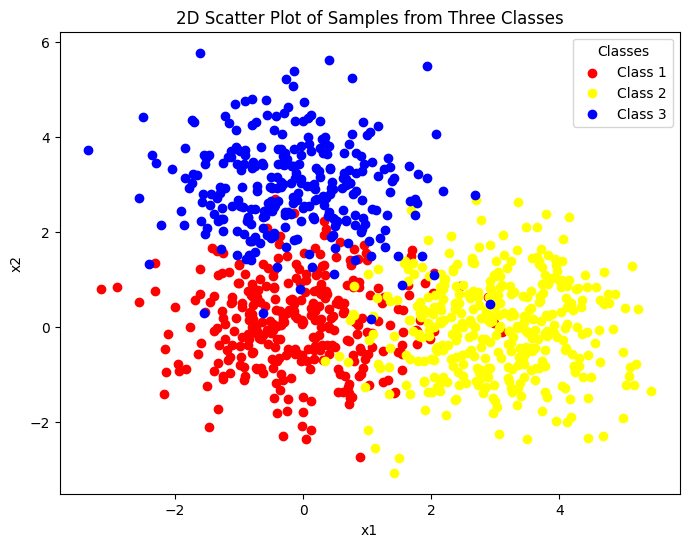

In [4]:

plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'yellow', 2: 'blue'}
for ck in np.unique(c):
    plt.scatter(X[c == ck, 0], X[c == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.show()

We define the decision boundary between two classes $c_i$ and $c_j$ as the set of points where the posterior probability of the two classes is equal. Write the expression of the decision boundary for this model. 

### **Q6** Compute the posterior probabilities for this model.

### **Q7A** Compute analytically the decision boundary between class 1 and class 2.

### **Q7B** Plot the optimal decision boundary for this model using the above calcultations. 


In [5]:
# def decision_boundary_class_1_2(mean_1, mean_2, pi_1, pi_2):
#     x1 = np.linspace(0, 2, 1000000)
#     x2 = np.linspace(-2, 4)
#     tolerance = 1e-5
    
#     x1_expanded = 2 * x1[:, None] * (mean_2[0] - mean_1[0]) 
#     x2_expanded = 2 * x2[None, :] * (mean_2[1] - mean_1[1])
#     result = x1_expanded + x2_expanded  
#     # f = 2*x1*(mean_2[0] - mean_1[0]) + 2*x2*(mean_2[1] - mean_1[1])
#     # constant = np.array([np.dot(mean_2, mean_2) - np.dot(mean_1, mean_1) for _ in range(len(f))])
    
#     # indexes = np.where(f == constant)[0]
#     constant = np.dot(mean_2, mean_2) - np.dot(mean_1, mean_1) + 2*np.log(pi_1 / pi_2)
#     # print(constant)
#     # print(x1)
#     matches = np.where(np.abs(result - constant) < tolerance) 
#     return x1[matches[0]], x2[matches[1]]

In [6]:
def sample_x(k, mean_vector, covariance_vector, n_samples):
    return multivariate_normal.rvs(mean_vector[k-1], covariance_vector[k-1], size=n_samples)

In [7]:
# def decision_boundary(samples, mean_1, mean_2, cov_1, cov_2, pi_1, pi_2):
#     tolerance = 1e-8
#     equal_x1 = np.ones(len(samples)) * np.finfo(np.float32).max
#     equal_x2 = np.ones(len(samples)) * np.finfo(np.float32).max
#     for i in range(len(samples)):
#         x1 = samples[i][0]
#         for j in range(len(samples)):
#             x2 = samples[j][1]
#             point = np.array([x1, x2])
#             pdf_1 = pi_1 * multivariate_normal.pdf(point, mean=mean_1, cov=cov_1)
#             pdf_2 = pi_2 * multivariate_normal.pdf(point, mean=mean_2, cov=cov_2)
#             if(np.abs(pdf_1 - pdf_2) < tolerance):
#                 #print(f"{pdf_1}, {pdf_2}")
#                 equal_x1[i] = point[0]
#                 equal_x2[j] = point[1]
    
#     idxs_1 = np.where(equal_x1 != np.finfo(np.float32).max)[0]
#     idxs_2 = np.where(equal_x2 != np.finfo(np.float32).max)[0]
#     return x1[idxs_1], x2[idxs_2]
            

    

In [8]:
def decision_boundary(mean_1, mean_2, pi_1, pi_2):
    
    q = np.dot(mean_2, mean_2) - np.dot(mean_1, mean_1) + 2*np.log(pi_1/pi_2)
    a = mean_2[0] - mean_1[0]
    b = mean_2[1] - mean_1[1]
    if a == 0:
        x2 = np.ones(100) * q / (2*b)
        x1 = np.linspace(-3, 7, 100)
        return x1, x2
    if b == 0:
        x1 = np.ones(100) * q / (2*a)
        x2 = np.linspace(-3, 7, 100)
        return x1, x2
    x1 = np.linspace(-3, 7)
    x2 = ((q/2) - a*x1) / b
    return x1, x2
    
   

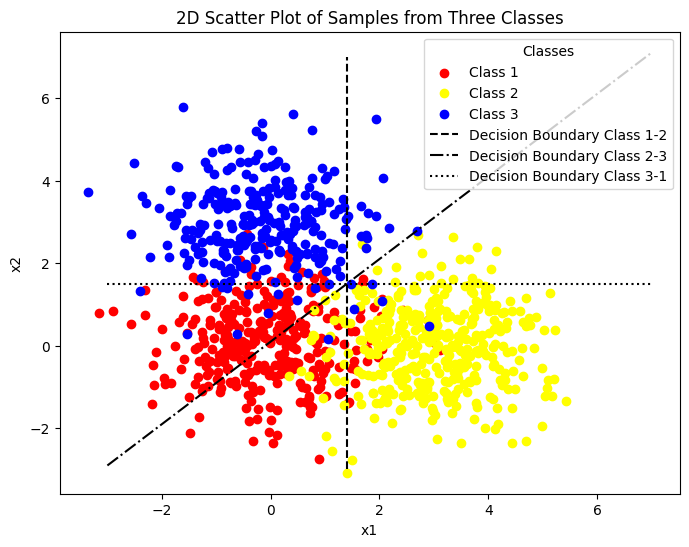

In [9]:
# samples_c1 = sample_x(1, mean_vector, covariance_vector, 100)
# samples_c2 = sample_x(2, mean_vector, covariance_vector, 100)
# samples_c3 = sample_x(3, mean_vector, covariance_vector, 100)


plt.figure(figsize=(8, 6))
boundary = 1.595
colors = {0: 'red', 1: 'yellow', 2: 'blue'}
for ck in np.unique(c):
    plt.scatter(X[c == ck, 0], X[c == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
# plt.axvline(x=boundary, linestyle='--', color='black', label='Decision Boundary Class 1-2')
linestyles = ['--', '-.', 'dotted']
for i in range(3):
    x1, x2 = decision_boundary( mean_vector[i], mean_vector[(i+1)%3], pi_vector[i], pi_vector[(i+1)%3])
    plt.plot(x1, x2, linestyle=linestyles[i], color='black', label=f'Decision Boundary Class {i+1}-{(i+1)%3+1}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.show()



### **Q8** Compute the error of the Bayes classifier on the dataset in Q5 as measured by the misclassification rate.


In [10]:
# Boundary class 1-2
x1, _ = decision_boundary( mean_vector[0], mean_vector[1], pi_vector[0], pi_vector[1])
bound_1 = x1[0]

# Boundary class 1-3
_, x2 = decision_boundary( mean_vector[0], mean_vector[2], pi_vector[0], pi_vector[2])
bound_2 = x2[0]

# Boundary class 2-3
x1, x2 = decision_boundary( mean_vector[1], mean_vector[2], pi_vector[1], pi_vector[2])
bound_3 = x2

def classify(x, bound_1, bound_2, bound_3):
    if(x[0] >= bound_1 and x[1] <= bound_2):
        return 2
    if(x[0] <= bound_1 and x[1] >= bound_2):
        return 3
    
    if(x[0] > bound_1 and x[1] > bound_2):
        if(np.all(np.full(len(bound_3), x[1]))):
            return 3
        else:
            return 2
    if (x[0] < bound_1 and x[1] < bound_2):
        if(np.all(np.full(len(bound_3), x[1]))):
            return 3
        else:
            return 1

c_hat = np.zeros(len(X))
for i,x in enumerate(X):  
    c_hat[i] = classify(x, bound_1, bound_2, bound_3) - 1
    
error_rate = np.sum(c_hat != c)/len(c)
print(f"The misclaffication rate is {error_rate}")

The misclaffication rate is 0.376


In [11]:
def bayes_classifier(x, mean_vector, covariance_vector, pi_vector):
    
    all_posteriors = np.zeros(3)
    for i in range(3):
        all_posteriors[i] = pi_vector[i] * multivariate_normal.pdf(x, mean_vector[i], covariance_vector[i])
        
    return np.argmax(all_posteriors)

c_hat = np.zeros(len(X))
for i,x in enumerate(X):
    c_hat[i] = bayes_classifier(x, mean_vector, covariance_vector, pi_vector)

error_rate = np.sum(c_hat != c)/len(c)
print(f"The misclaffication rate is {error_rate}")


The misclaffication rate is 0.089


Consider now the case where the covariance matrices are different. Take the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [\pi_1=0.3, \pi_2=0.4, \pi_3=0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array}\right]$$


### **Q9** What is the decision boundary between class 1 and class 2 in this case?


In [12]:
np.linalg.inv(np.eye(2) + np.fliplr(np.eye(2))*0.5)

array([[ 1.33333333, -0.66666667],
       [-0.66666667,  1.33333333]])

In this case, the decision boundary between classes 1 and 2 is not a line but it is a (part of a) circumference function of x1 and x2 

### **Q10** Plot the decision boundary for this model and discuss the difference with the previous case (if any).



Using the calculation done at question 9, I write directly the expression of the boundary for class 1 and 2

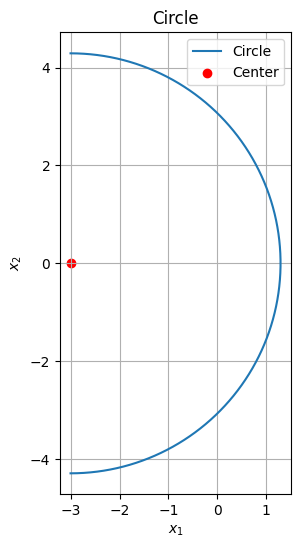

In [13]:
from sympy import symbols, Eq, solve

# x1, x2 = symbols('x1 x2')
# a, b, r = symbols('a b r')
# circle = Eq((x1 + 3)**2 + (x2)**2, (18 + np.log(2*pi_vector[0]/pi_vector[1]))**2)

radius = np.sqrt(18 + np.log(2 * pi_vector[0] / pi_vector[1]))
center = (-3, 0)
theta = np.linspace(-np.pi/2, np.pi/2, 100)
x1 = center[0] + radius * np.cos(theta)
x2 = center[1] + radius * np.sin(theta)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(x1, x2, label="Circle")
plt.scatter(center[0], center[1], color='red', label="Center")
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Circle")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid()
plt.show()


### **Q11** Sample 1000 points from the heterogeneous model defined after Q8 and plot them. 

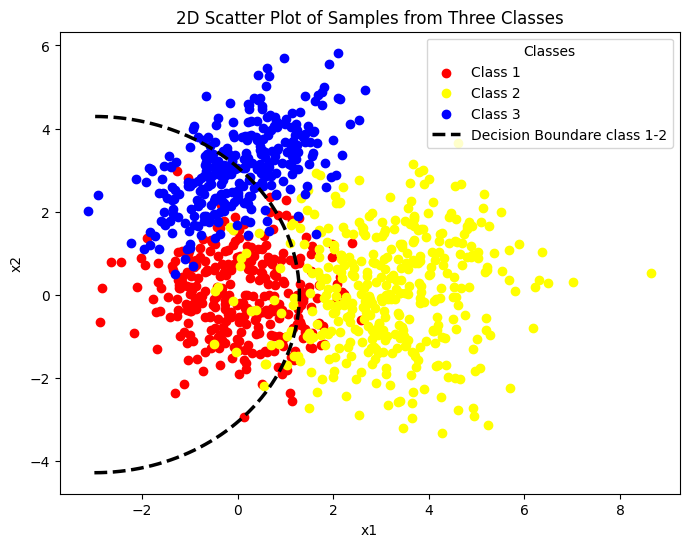

In [14]:
covariance_vector_m2 = covariance_vector
covariance_vector_m2[1] = 2*np.eye(2)
covariance_vector_m2[2] = np.eye(2) + np.fliplr(np.eye(2))*0.5

X_m2, c_m2 = sample_x_c(pi_vector, mean_vector, covariance_vector_m2, 1000)

plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'yellow', 2: 'blue'}
for ck in np.unique(c_m2):
    plt.scatter(X_m2[c_m2 == ck, 0], X_m2[c_m2 == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
plt.plot(x1, x2, linestyle='--', linewidth = '2.5', color='black', label="Decision Boundare class 1-2")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.show()

If we want to plot also the other boundaries. The general result of the equation above for the model i the generic conic function

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_11856\1589777741.py:25: UserWarning: The following kwargs were not used by contour: 'linestyle', 'label'
  plt.contour(X1, X2, Z, levels=[0], colors='black', linestyle= linestyles[i], label=f'Bondary Class {i%3}-{(i%3)+1}')


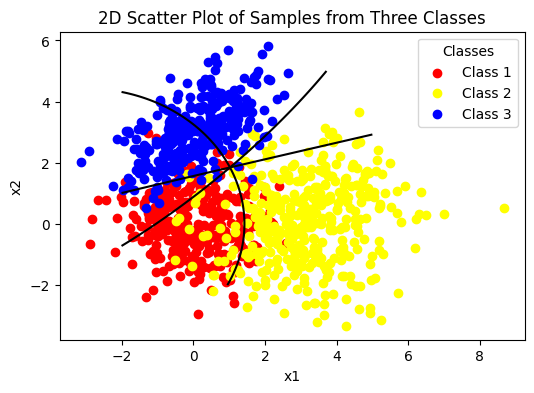

In [ ]:
from numpy.linalg import  inv, det
x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-2, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Generic conic: Ax^{2}+Bxy+Cy^{2}+Dx+Ey+F=0
def generic_conic(mean_1, mean_2, cov_1, cov_2, pi_1, pi_2, X1, X2):
    A = (inv(cov_1) - inv(cov_2))[0][0]
    B = (inv(cov_1) - inv(cov_2))[0][1]
    C = A   # Diagonal matrices
    D = -2 * (mean_1.T @ inv(cov_1) - mean_2 @ inv(cov_2))[0]
    E = -2 * (mean_1.T @ inv(cov_1) - mean_2 @ inv(cov_2))[1]
    F = +2 * np.log(pi_1*np.sqrt(det(cov_2)) / (pi_2 * np.sqrt(det(cov_1)))) + mean_2.T @ inv(cov_2) @ mean_2 - mean_1.T @ inv(cov_1) @ mean_1 
    return A*X1**2 + 2*B*X1*X2 + C*X2**2 + D*X1 + E*X2 - F


plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'yellow', 2: 'blue'}
for ck in np.unique(c_m2):
    plt.scatter(X_m2[c_m2 == ck, 0], X_m2[c_m2 == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
linestyles = ['--', '-.', 'dotted']
for i in range(3):
    Z = generic_conic(mean_vector[i], mean_vector[(i+1)%3], covariance_vector_m2[i], covariance_vector_m2[(i+1)%3], pi_vector[i], pi_vector[(i+1)%3], X1, X2)
    plt.contour(X1, X2, Z, levels=[0], colors='black', linestyle= linestyles[i], label=f'Bondary Class {i%3}-{(i%3)+1}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.show()
plt.show()

### **Q12** Compute the error of the Bayes classifier on this dataset.

The Bayes classifier optimizes the posterior probability

In [62]:

c_hat = np.zeros(len(X_m2))
for i,x in enumerate(X_m2):
    c_hat[i] = bayes_classifier(x, mean_vector, covariance_vector_m2, pi_vector)

error_rate = np.sum(c_hat != c_m2)/len(c_m2)
print(f"The misclaffication rate is {error_rate}")
    
    

The misclaffication rate is 0.101
